# Matplotlib gallery

matplotlib est une bibliothque complémentaire pour faire de *beaux* graphiques

In [1]:
import matplotlib
print(f"matplotlib version {matplotlib.__version__}")

matplotlib version 3.5.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Demo of combination of images')

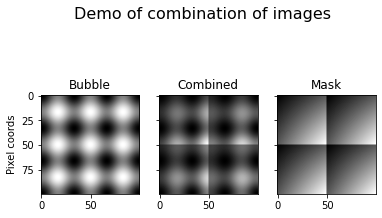

In [3]:
# Custom demo
n=100
space = np.linspace(0,3*np.pi,n)
x, y = np.meshgrid(space, space, sparse=True)

fig=plt.figure() # new figure

subfigs=fig.subplots(1, 3, sharey=True) # new set of subplots
bubble = np.sin(x)**2+np.sin(y)**2
subfigs[0].imshow(bubble, cmap='gray')
subfigs[0].set_title("Bubble")
subfigs[0].set_ylabel('Pixel coords')

mask = x*y/np.max(x*y)
mask = mask[-n//2:,-n//2:]  # select corner submatrix
mask = np.tile(mask, (2,2)) # repeat as a tile
subfigs[2].imshow(mask, cmap='gray')
subfigs[2].set_title("Mask")

subfigs[1].imshow(mask*bubble, cmap='gray')
subfigs[1].set_title("Combined")

fig.suptitle('Demo of combination of images', fontsize=16)

/Users/pascal/haveneer/Python/NumericalSciencesWithPython/venv/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-4.5, 4.5)

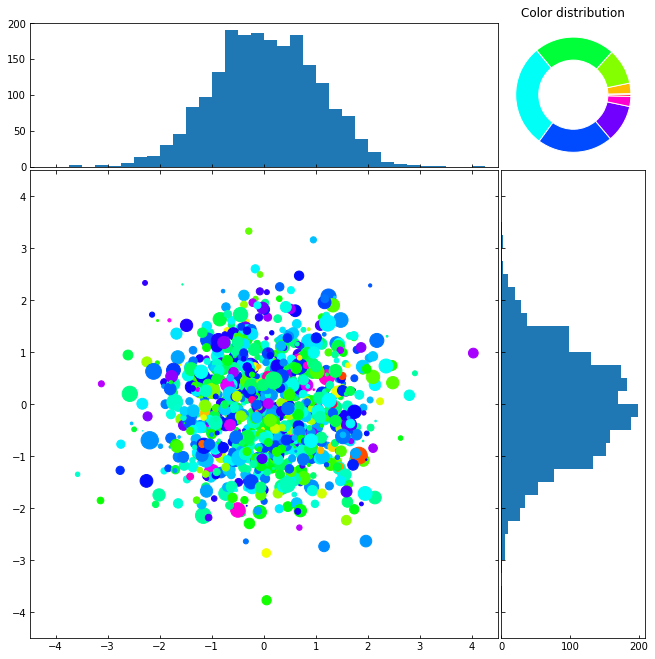

In [4]:
# inspired by https://matplotlib.org/3.1.1/gallery
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
nbpoints = 2000
x, y, c, s = np.random.randn(4, nbpoints)
s *= 100
cmin=c.min()
cmax=c.max()


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]
rect_extra = [left + width + spacing, bottom + height + spacing, 0.2, 0.2]

# start with a rectangular Figure
plt.figure(figsize=(10, 10))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)
ax_extra = plt.axes(rect_extra) 

# the scatter plot:
cmap = plt.get_cmap("hsv") # cf https://matplotlib.org/examples/color/colormaps_reference.html
ax_scatter.scatter(x, y, c=c, s=s, cmap=cmap, vmin=cmin, vmax=cmax)

c_nbins = 9
c_hist, c_bins = np.histogram(c,bins = np.linspace(cmin,cmax,c_nbins+1)) # +1 bornes != intervalles
c_colors= cmap(np.linspace(0,1,c_nbins))
ax_extra.pie(c_hist, radius=1, colors=c_colors,
        wedgeprops=dict(width=0.4, edgecolor='w'))
ax_extra.set_title("Color distribution")

# now determine nice limits by hand:
binwidth = 0.25
lim = (1+np.ceil(np.abs([x, y]).max() / binwidth)) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

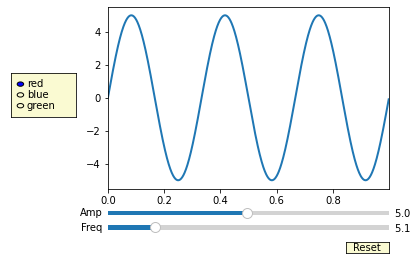

In [5]:
# copied from https://matplotlib.org/3.1.1/gallery/widgets/slider_demo.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

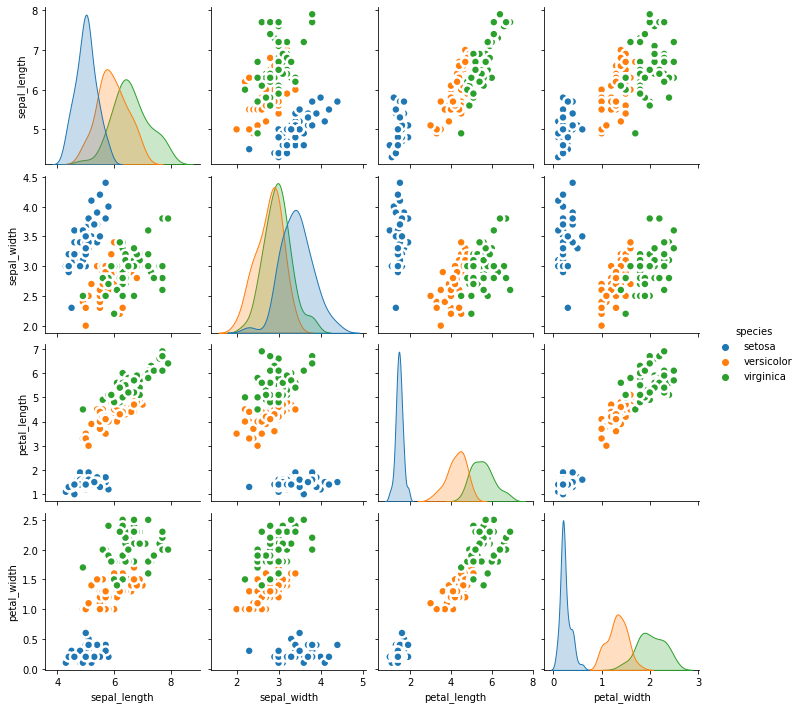

In [6]:
# copied from https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
# Load Dataset
import seaborn as sns
df = sns.load_dataset('iris')
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

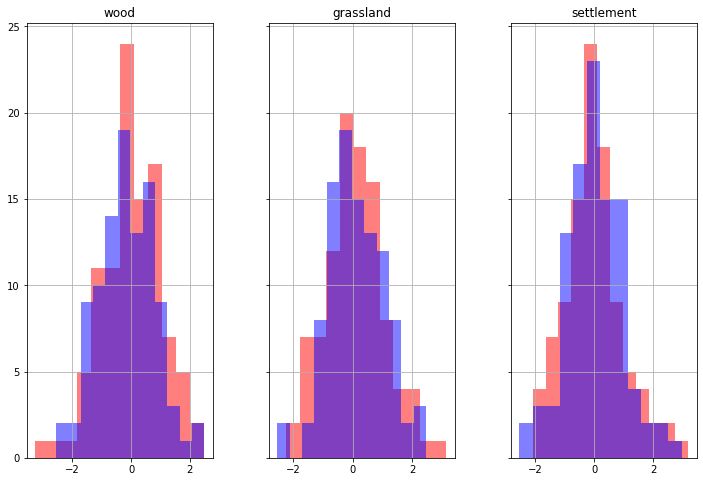

In [7]:
import pandas as pd
df = pd.DataFrame({ 'a_wood' : np.random.randn(100),
                 'a_grassland' : np.random.randn(100),
                 'a_settlement' : np.random.randn(100),
                 'b_wood' : np.random.randn(100),
                 'b_grassland' : np.random.randn(100),
                  'b_settlement' : np.random.randn(100)})
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(12, 8))
n = 3
for j in range(n):
    df.hist(column=df.columns[j], bins=12, ax=ax[j], alpha=0.5, color='red')
    df.hist(column=df.columns[j+n], bins=12, ax=ax[j], alpha=0.5, color='blue')
    ax[j].set_title(df.columns[j][2:])

More examples here: https://matplotlib.org/gallery/index.html